How are in_demand skills trending for Data Analysts?

Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. plot the monthly skill demand

In [176]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

ay['job_skills']= ay['job_skills'].apply(lambda zee: 
                                         ast.literal_eval(zee) 
                                         if pd.notna (zee) else zee)

In [177]:
ay_DA_US = ay[(ay['job_title'] == 'Data Analyst') & (ay['job_country'] == 'United States')].copy()
#note: job_title was used not job_title_short

ay_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,NaN,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,NaN,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,NaN,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,NaN,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,NaN,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e..."
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,NaN,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'..."
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."


In [178]:
ay_DA_US['job_posted_month'] = ay_DA_US['job_posted_date'].dt.month

In [179]:
ay_usDA_explode = ay_DA_US.explode('job_skills')

In [180]:
ay_usDA_pivot = ay_usDA_explode.pivot_table(
    index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

ay_usDA_pivot ['sql']

job_posted_month
1     1138
2      782
3      802
4      845
5      706
6      742
7      560
8      784
9      485
10     556
11     472
12     433
Name: sql, dtype: int64

In [181]:
ay_usDA_pivot.loc['Total'] = ay_usDA_pivot.sum()

ay_usDA_pivot = ay_usDA_pivot[ay_usDA_pivot.loc['Total'].sort_values (ascending=False).index]

ay_usDA_pivot = ay_usDA_pivot.drop('Total')

#ay_usDA_pivot['Total'] = ay_usDA_pivot.sum(axis=1, numeric_only=True) 
#to sum only numerical values across colunms into a new column

ay_usDA_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [182]:
#ay_usDA_pivot.plot(kind='line') --needs cleanup

In [183]:
ay_usDA_group = ay_DA_US.groupby('job_posted_month').size()

ay_usDA_group

job_posted_month
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [184]:
usda_perc = ay_usDA_pivot.div(ay_usDA_group/100, axis=0)

usda_perc = usda_perc.reset_index(names='month name')

usda_perc['month name'] = usda_perc['month name'].apply(
    lambda x: pd.to_datetime(x, format= '%m').strftime ('%b'))

usda_perc = usda_perc.set_index('month name')

usda_perc

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
month name,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


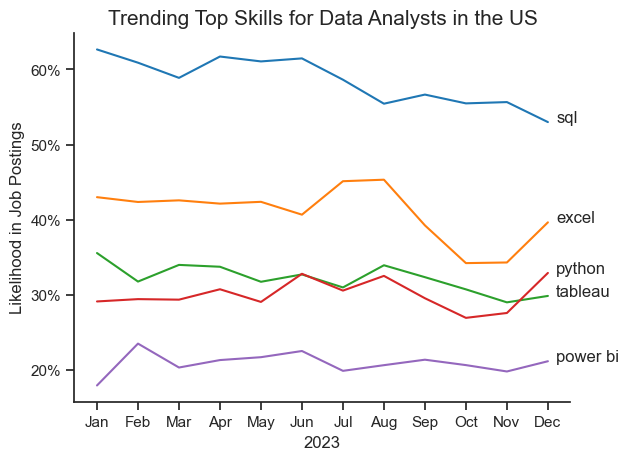

In [185]:
ay_plot = usda_perc.iloc[:,:5]

sns.lineplot(data=ay_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US', fontsize= 15)
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, ay_plot.iloc[-1, i], ay_plot.columns[i])

In [187]:
ay_US = ay[ay['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

In [188]:
job_titles = ay_US['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [193]:
ay_US_top6 = ay_US[ay_US['job_title_short'].isin(job_titles)]

ay_US_top6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15030 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15030 non-null  object        
 1   job_title              15030 non-null  object        
 2   job_location           14816 non-null  object        
 3   job_via                15030 non-null  object        
 4   job_schedule_type      15018 non-null  object        
 5   job_work_from_home     15030 non-null  bool          
 6   search_location        15030 non-null  object        
 7   job_posted_date        15030 non-null  datetime64[ns]
 8   job_no_degree_mention  15030 non-null  bool          
 9   job_health_insurance   15030 non-null  bool          
 10  job_country            15030 non-null  object        
 11  salary_rate            15030 non-null  object        
 12  salary_year_avg        15030 non-null  float64       
 13  sala

In [200]:
job_order = ay_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

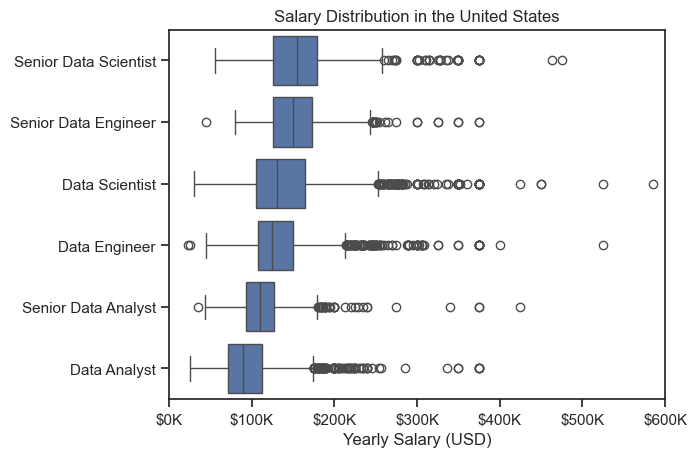

In [201]:
sns.boxplot(data=ay_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.ylabel("")
plt.xlabel('Yearly Salary (USD)')
plt.xlim (0, 600000)
ax = plt.gca() #gca - get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${int (z/1000)}K'))
plt.show()